### 1. 지역별 총인구수 Top5

In [25]:
import pandas as pd
data = pd.read_csv('data/인구현황.csv')
data1 = data.copy()
data = data[data['행정기관'] != '전국'].copy()
data[['행정기관','총인구수']].sort_values(by='총인구수',ascending=False).head()

,행정기관,총인구수
9,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
16,경상남도,3228380
4,인천광역시,3021010


##### 1-1. 지역별 총인구수 plot

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
[ (font.name, font.fname) for font in fm.fontManager.ttflist if 'Mal' in font.name ]
font_path = 'C:\\windows\\Fonts\\malgun.ttf'
font_prop = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_prop)

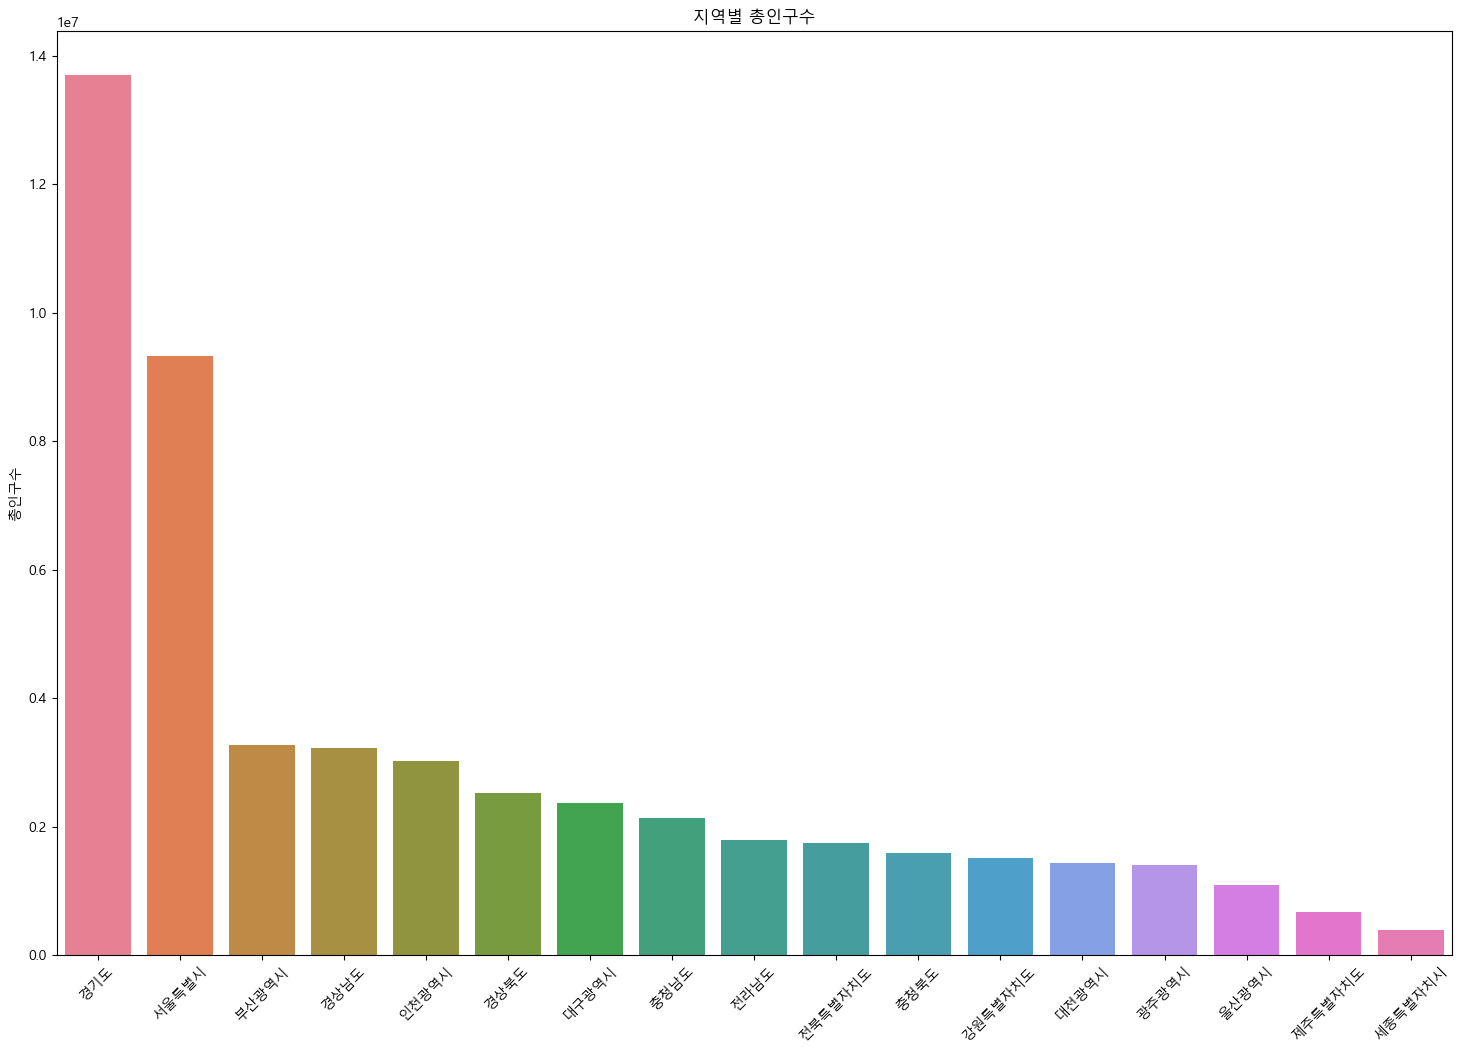

In [8]:
figure,axes1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)
sns.barplot(data.sort_values(by='총인구수',ascending=False), x='행정기관',y='총인구수',ax=axes1, hue='행정기관')
axes1.set_title('지역별 총인구수')
axes1.set_xlabel('')
plt.xticks(rotation=45)
plt.show()

### 2. 세대당 인구수 높은 지역 Top5

In [11]:
data[['행정기관','세대당 인구']].sort_values(by='세대당 인구',ascending=False).head().reset_index(drop=True)

,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


##### 2-1. 지역별 세대당 인구 Plot

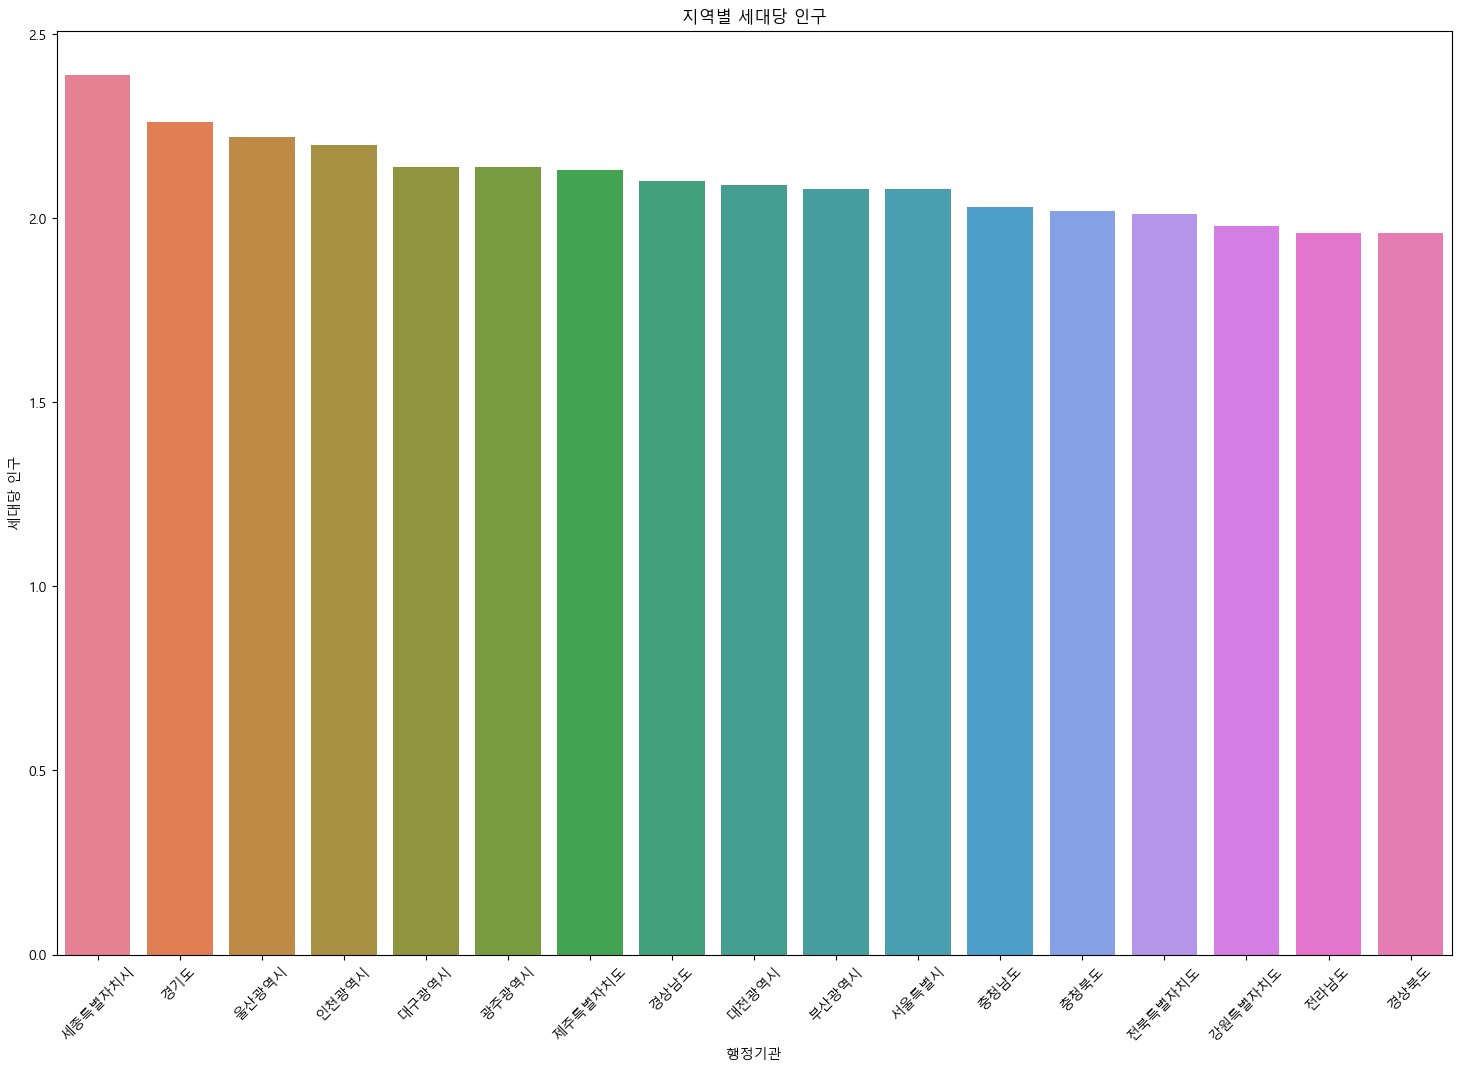

In [12]:
figure,axes1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)
sns.barplot(data.sort_values(by='세대당 인구',ascending=False), x='행정기관',y='세대당 인구',ax=axes1, hue='행정기관')
axes1.set_title('지역별 세대당 인구')
plt.xticks(rotation=45)
plt.show()

### 3. 남녀 비율 분석

In [13]:
data[['행정기관','남여 비율']].sort_values(by='남여 비율',ascending=False).reset_index(drop=True)

,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02
5,전라남도,1.02
6,경기도,1.01
7,강원특별자치도,1.01
8,제주특별자치도,1.00
9,인천광역시,1.00


##### 3-1. 남녀 비율 분석 Plot

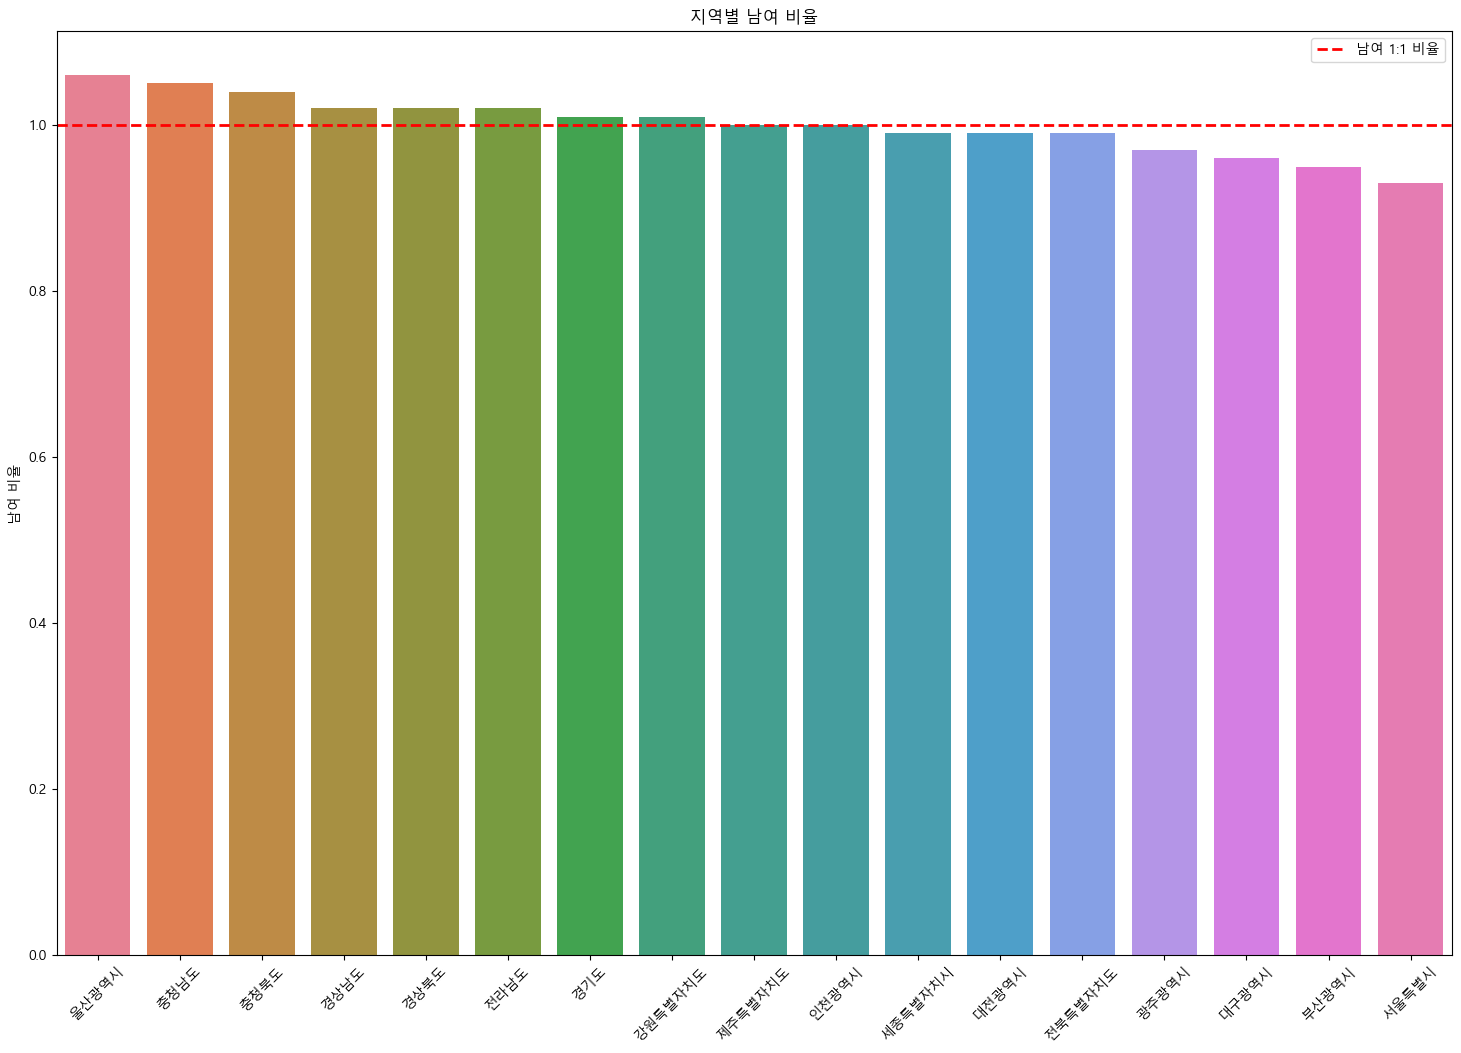

In [18]:
figure,axes1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)
sns.barplot(data.sort_values(by='남여 비율',ascending=False), x='행정기관',y='남여 비율',ax=axes1, hue='행정기관')
plt.axhline(y=1.0, color='red', linestyle='--',linewidth=2, label='남여 1:1 비율')
axes1.legend()
axes1.set_title('지역별 남여 비율')
axes1.set_xlabel('')
plt.xticks(rotation=45)
plt.show()

### 4. 남자초과 / 여자초과 분석

In [23]:
import numpy as np

conditions = [data['남여 비율'] < 1, data['남여 비율'] > 1, data['남여 비율'] == 1]
choices = ['여초', '남초', '동일']
data['남초여초'] = np.select(conditions, choices)

# data['남초여초'] = data['남여 비율'].apply(lambda x: '여초' if x < 1 else ('남초' if x > 1 else '동일'))

s_data = data[['행정기관','남여 비율','남초여초']].reset_index(drop=True)
s_data.index = s_data.index + 1
s_data

,행정기관,남여 비율,남초여초
1,서울특별시,0.93,여초
2,부산광역시,0.95,여초
3,대구광역시,0.96,여초
4,인천광역시,1.00,동일
5,광주광역시,0.97,여초
6,대전광역시,0.99,여초
7,울산광역시,1.06,남초
8,세종특별자치시,0.99,여초
9,경기도,1.01,남초
10,강원특별자치도,1.01,남초


### 5. 세대당 인구 평균보다 높은 지역

In [28]:
print(f"전국 평균 세대당 인구수 : {data1[data1['행정기관'] == '전국']['세대당 인구'].values[0]}")
data[['행정기관','세대당 인구']].sort_values(by='세대당 인구',ascending=False).reset_index(drop=True)

전국 평균 세대당 인구수 : 2.12


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14
5,광주광역시,2.14
6,제주특별자치도,2.13
7,경상남도,2.10
8,대전광역시,2.09
9,부산광역시,2.08


##### 5-1. 남초 vs 여초 개수 Plot (seaborn의 countplot), 지역별 세대 수 Plot (seaborn의 barplot)

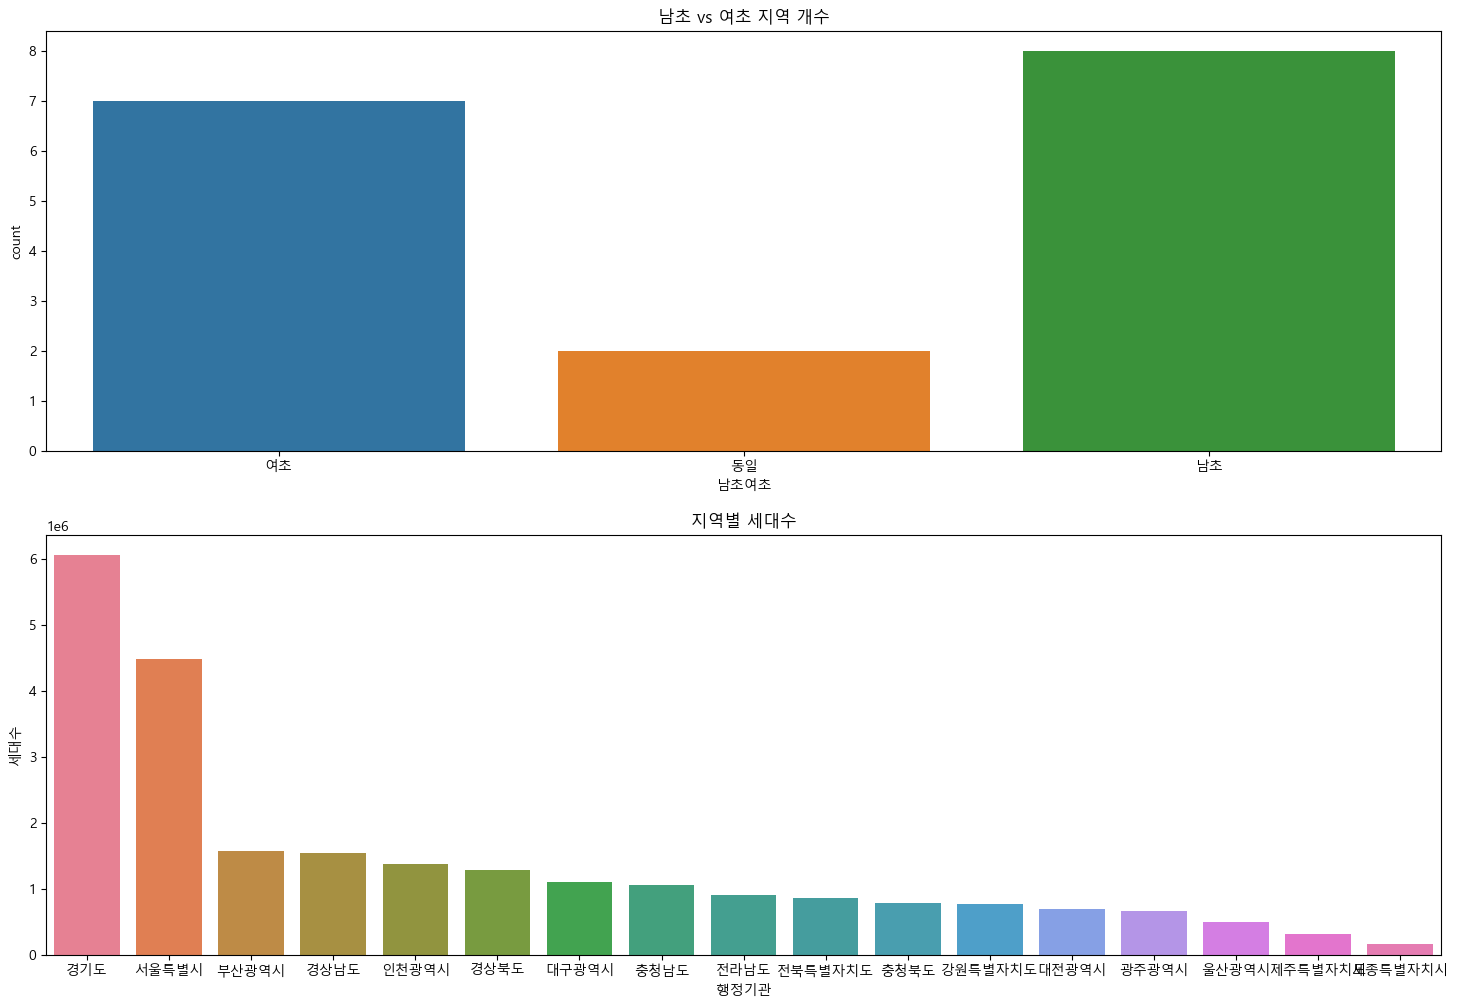

In [33]:
figure,(axes1,axes2)= plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,12)
sns.countplot(s_data, x='남초여초',ax=axes1, hue='남초여초')
sns.barplot(data.sort_values(by='세대수',ascending=False), x='행정기관',y='세대수',ax=axes2, hue='행정기관')
axes1.set_title('남초 vs 여초 지역 개수')
axes2.set_title('지역별 세대수')
plt.show()

### 6. 남자 인구 vs 여자 인구 비교 Plot

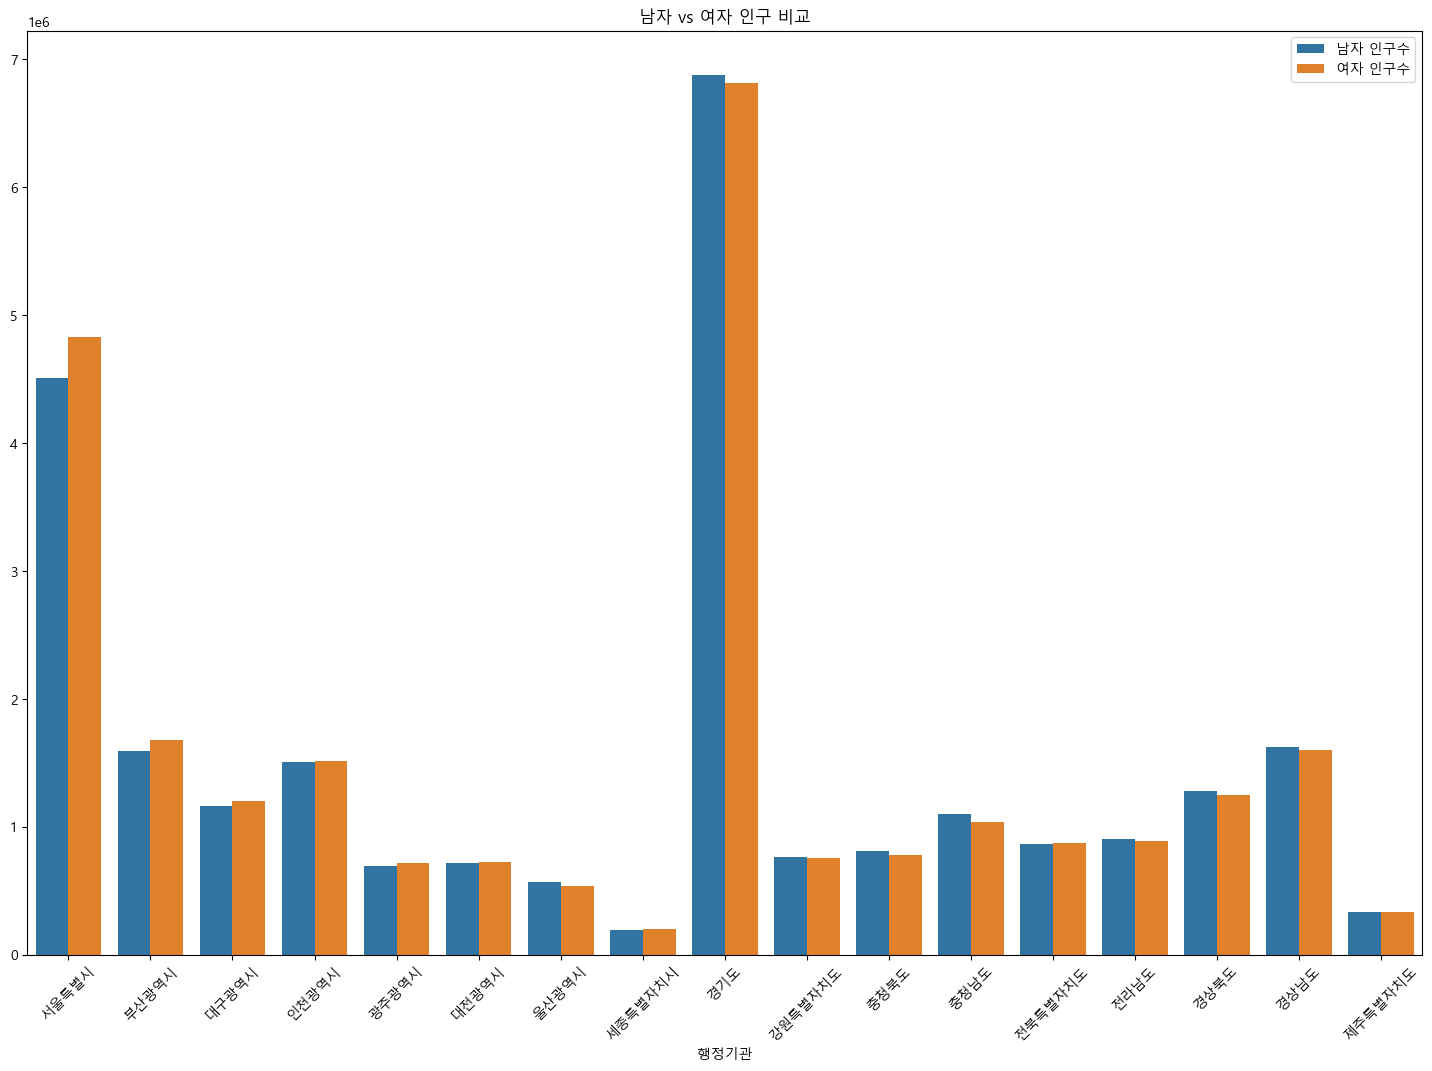

In [42]:
data2 = data.melt(id_vars='행정기관', value_vars=['남자 인구수', '여자 인구수'],var_name='성별', value_name='인구수')
figure,axes1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)
sns.barplot(data=data2, x='행정기관',y='인구수',ax=axes1, hue='성별')
axes1.set_title('남자 vs 여자 인구 비교')
axes1.set_ylabel('')
axes1.legend().set_title(None)
plt.xticks(rotation=45)
plt.show()